<h1 style="color:rgb(0,120,170)">k-nearest neighbors</h1>

<h2 style="color:rgb(0,120,170)">Task 1: Visualization</h2>

In [1]:
import matplotlib.pyplot as plt
import scipy
import matplotlib
import sklearn
import numpy as np
import pandas as pd



print('sklearn version:',sklearn.__version__)
print('pandas version:',pd.__version__)
print('scipy version:',scipy.__version__)
print('numpy version:',np.__version__)
print('pandas version:',pd.__version__)
print('matplotlib version:',matplotlib.__version__)

sklearn version: 1.1.2
pandas version: 1.4.2
scipy version: 1.9.2
numpy version: 1.21.5
pandas version: 1.4.2
matplotlib version: 3.5.1


In [2]:
# read data, split into X(features) and y(labels)
Z = np.genfromtxt('DataSet1.csv', delimiter=';')
X, y = Z[:,:-1], Z[:,-1]

<h3 style="color:rgb(210,90,80)">Task 1.1:</h3>

Now visualize the data stored in `DataSet1.csv` with a scatter plot.<br>
The first two columns are the features which hold the $x_1$ and $x_2$ coordinates of the data.<br>
The last column provides the labels $y$ ($\pm1$) of the data. Use different colors for different labels.<br>
Always label the axes of all your plots.

<h3 style="color:rgb(210,90,80)">Code & Question 1.1:</h3>

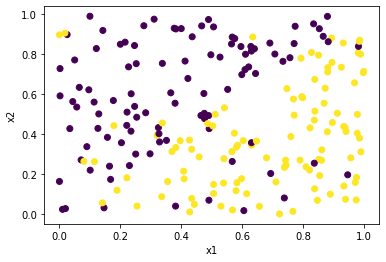

In [3]:
# your code goes here ↓↓↓
plt.scatter(X[:,0],X[:,1],c = y)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

***Questions:***<br>

**Are the two classes linearly seperable?**<br>

a_) Yes<br>
b_) No<br>

**Are there any outliers?**<br>

c_) Yes<br>
d_) No<br>

**Would outliers affect a kNN algorithm if k is small (<= 2)?**<br>

e_) Yes<br>
f_) No<br>


In [4]:
a_ = False
b_ = True

c_ = True
d_ = False

e_ = True
f_ = False

<h3 style="color:rgb(210,90,80)">Question 1.2:</h3>

***Which of the following statements about $k$-nearest neighbors are correct?***<br>

g_) requires very long training time already for small data sets <br>
h_) not suited for large datasets<br>
i_) sensitive to the rescaling of individual features<br>
j_) has many trainable model parameters <br>

In [5]:
g_ = False
h_ = True
i_ = True
j_ = False

<h2 style="color:rgb(0,120,170)">Task 2: Training the model</h2>

Now we want to put the kNN into action. To this end, work through the following points

* Implement `train_kNN` which fits newly created instance of `KNeighborsClassifier` (`sklearn`) to some training data
* Complete `eval_kNN`such that it outputs the prediction for some input data using a passed classifier
* Program the function `mean_zero_one_loss` that calculates the mean zero one loss (see lecture slides) of predicted values and samples from the test set
* Put all of this functions together in `run_kNN` to fit a model to training data, make predictions on left our data and compute the loss for these predictions. To split the dataset into train and test sets, use 10-fold cross validation (CV), loop over all the splits and collect the mean error for each split.

At the end of this task, visualize the mean error for $k \in \{1,3,5,...,177,179\}$ in a plot and answer the following questions.

In [6]:
from sklearn.model_selection import KFold
from sklearn import neighbors

<h3 style="color:rgb(210,90,80)">Code 2.1 (5 points):</h3>

In [7]:
"""
Function that fits a kNN to given data
@param X_train, np array, training data
@param y_train, np array, training labels
@param k_train, integer, k for the kNN

@output classifier, kNN instance, classifier that was fitted to training data
"""
def train_kNN(X_train,y_train,k_train): 
    #your code goes here ↓↓↓
    classifier = neighbors.KNeighborsClassifier(n_neighbors = k_train).fit(X_train,y_train)
    return classifier 

<h3 style="color:rgb(210,90,80)">Code 2.2 (5 points):</h3>

In [8]:
"""
Function that returns predictions for some input data
@param classifier, kNN instance, trained kNN classifier
@param X_eval, np array, data that you want to predict the labels for

@output predicitons, np array, predicted labels
"""
def eval_kNN(classifier, X_eval): 
    #your code goes here ↓↓↓
    predictions = classifier.predict(X_eval)
    return predictions

<h3 style="color:rgb(210,90,80)">Code 2.3 (5 points):</h3>

In [9]:
"""
Function that calculates the mean zero-one loss for given true and predicted labels
@param y_true, np array, true labels
@param y_pred, np array, predicted labels

@output loss, float, mean zero-one loss
"""
def mean_zero_one_loss(y_true, y_pred):
    #your code goes here ↓↓↓
    loss = sklearn.metrics.zero_one_loss(y_true,y_pred)
    return loss

<h3 style="color:rgb(210,90,80)">Code 2.4 (5 points):</h3>

In [10]:
"""
Function that combines all functions using CV
@param X, np array, training data
@param y, np array, training labels
@param nf, integer, number of folds for CV
@param k, integer, k for kNN

@output mean_error, float, mean error over all folds
"""
def run_kNN(X,y,nf,k):
    #your code goes here ↓↓↓
    k_fold = KFold(n_splits = nf)
    k_losses = []
    for train_index, test_index in k_fold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        classifier = train_kNN(X_train,y_train,k)
        y_pred = eval_kNN(classifier, X_test)
        loss = mean_zero_one_loss(y_test, y_pred)
        k_losses.append(loss)

    mean_error = np.mean(k_losses)
    return mean_error

In [11]:
m = 179
nf = 10
error_holder = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder.append(run_kNN(X,y,nf,k))

<h3 style="color:rgb(210,90,80)">Code & Question 2.5 (5 points):</h3>

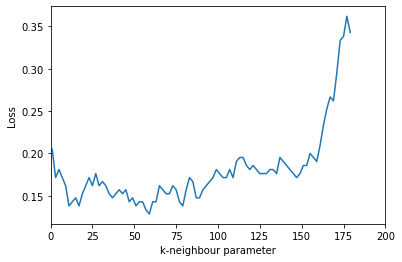

In [12]:
#implement the plot as described in the task description
k_neighbour = list(range(1,181,2))
plt.plot(k_neighbour,error_holder)
plt.xlabel("k-neighbour parameter")
plt.ylabel("Loss")
plt.xlim((0,200))
plt.show()


**What range for $k$ holds the lowest errors (on average) - by visual inspection?**<br>

k_) [0,5]<br>
l_) [50,60]<br>
m_) [150,175]<br>

**Is the error larger for $k$=175 or for $k$=1?**<br>

n_) 175<br>
o_) 1<br>

In [13]:
k_ = False
l_ = True
m_ = False

n_ = True
o_ = False

<h3 style="color:rgb(210,90,80)">Question 2.6:</h3>

<i><b>Thinking of model complexity as the ability of the model to fit to noise, what choice of $k$ leads to complex models? Why?</b></i><br>
(Multiple answers might be correct)

p_) Model complexity increases with increasing $k$, as larger $k$ means the model has more parameters. <br>
q_) Model complexity increases with increasing $k$, as larger $k$ means that more neighbors influence the decision. <br>
r_) Model complexity increases with decreasing $k$, as smaller $k$ means that fewer neighbors influence the decision. <br>
s_) Model complexity increases with decreasing $k$, as smaller $k$ means the model has fewer parameters. <br>

t_) Very small values of $k$ correspond lead to underfitting <br>
u_) Very small values of $k$ correspond lead to overfitting <br>
v_) Very large values of $k$ correspond lead to underfitting <br>
w_) Very large values of $k$ correspond lead to overfitting <br>

In [14]:
p_ = False
q_ = False
r_ = True
s_ = False

t_ = False
u_ = True
v_ = True
w_ = False

<h2 style="color:rgb(0,120,170)">Task 3: Adding noise to dataset</h2>

To make things more interesting, mix up the dataset a bit:

* Implement `generate_flip_vector` which should return an array of length $n$ where exactly $\left \lfloor{n/6}\right \rfloor $ entries as $-1$ and the rest are $1$
* Now implement `flip_labels` that flips the labels according to the flip vector


Then perform the same steps as before, i.e. plot the data and plot the error (estimated via the empirical risk) vs. $k$ for 10-fold cross validation.

<h3 style="color:rgb(210,90,80)">Code 3.1:</h3>

In [17]:
"""
Function that produces a flip vector consisting of -1's and 1's (1/6,5/6)
@param n, integer, the length of the vector that should be returned

@output flip_vector, np array, the vector that indicates what labels will be flipped
"""

def generate_flip_vector(n):
    minus_one = - np.ones(n//6)
    one = np.ones(n - len(minus_one))
    flip_vector = np.concatenate((one,minus_one))
    np.random.shuffle(flip_vector)
    return flip_vector

<h3 style="color:rgb(210,90,80)">Code 3.2:</h3>

In [18]:
"""
Function that flips labels given a flip vector
@param y, np array, labels to flip (don't forget to copy the data in order not to alter the original labels)
@param flip_vector, np array, array that should be used to flip the labels

@output flipped_labels, np array, the labels where 1//6 labels are flipped
"""
def flip_labels(y,flip_vector):
    y_copy = y.copy()
    flipped_labels = y_copy * flip_vector
    return flipped_labels

In [19]:
#define new y vector by calling flip function
fl_vec = generate_flip_vector(len(y))
y_fl = flip_labels(y,fl_vec)

error_holder_flipped = []
for k in range(1,m+1,2): #range with 179 included and step of 2
    error_holder_flipped.append(run_kNN(X,y_fl,nf,k))

<h3 style="color:rgb(210,90,80)">Plot & Question 3.3</h3>

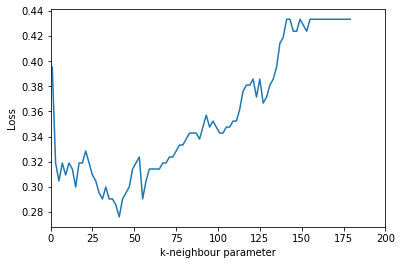

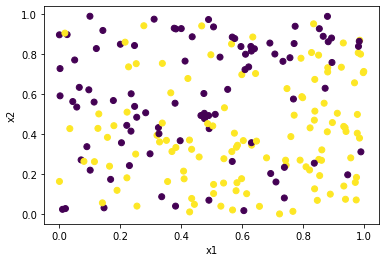

In [20]:
k_neighbour = list(range(1,181,2))
plt.plot(k_neighbour,error_holder_flipped)
plt.xlabel("k-neighbour parameter")
plt.ylabel("Loss")
plt.xlim((0,200))
plt.show()


plt.scatter(X[:,0],X[:,1],c = y_fl)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

***Which differences do you observe?<br>
Which conclusions do you draw from that?***


x_) The two classes are well seperable and have nearly no overlap <br>
y_) The two classes are now less seperable and have a larger overlap <br>

z_) Random label flipping brings noise into the data <br>
a2_) Random label flipping simply swaps data, but does not add noise <br>

b2_) Overall, the error remains nearly unchanged compared to the original data set. <br>
c2_) Overall, the error increases compared to the original data set. <br>

In [21]:
x_ = False
y_ = True

z_ = True
a2_ = False

b2_ = False
c2_ = True

<h2 style="color:rgb(0,120,170)">Task 4: k-NN in higher dimensions</h2>

Going back to unflipped labels: Write a function "add_features(X)" which will add 4 additional features $x_3,x_4,x_5,x_6$ to the matrix X, calling the resulting matrix X_new. Each of the new features should be uniformly distributed between $0$ and $1$.<br>

As before, plot the error versus $k$ for 10-folds CV for with 1, 2, 3, 4 incrementally added features. (4 plots) <br>

Additionaly, for the particular choice $k=11$, plot the mean error versus $f$ with $f = 2,3,4,5,6$ the number features. Thus, the first data point (where $f=2$) shows the error for the original feature matrix X without extra dimensions.<br>

<h3 style="color:rgb(210,90,80)">Code 4.1:</h3>

In [22]:
"""
Function that adds random features to dataset
@param X, np array, dataset

@output X_new, np array, dataset enhanced with 4 random features
"""
def add_features(X):
    np.random.seed(1234)
    #your code goes here ↓↓↓ 
    X_new_vec = X.copy() 
    for i in range(4):
        x_i = np.random.rand(X.shape[0],1)
        X_new_vec = np.concatenate((X_new_vec,x_i),axis = 1)
    return X_new_vec

In [23]:
#define new feature matrix by calling add_features function
X_new = add_features(X)

<h3 style="color:rgb(210,90,80)">Code & Question 4.2 (15 points):</h3>

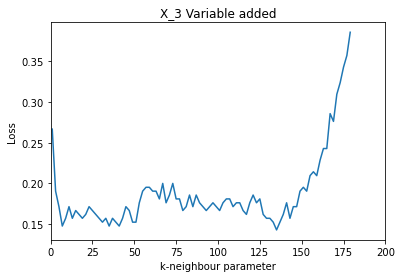

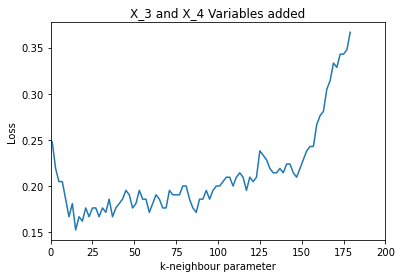

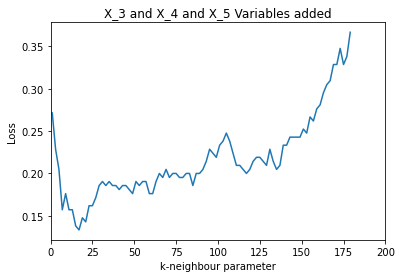

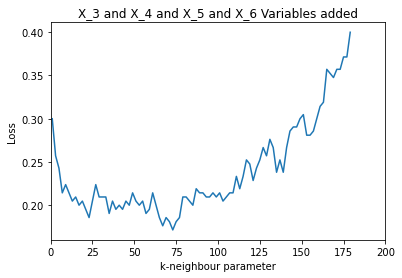

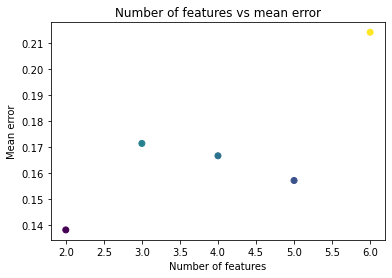

In [24]:
def error_calculation(X_var,y_var,nf):
    m = 179
    error_holder = []
    for k in range(1,m+1,2): #range with 179 included and step of 2
        error_holder.append(run_kNN(X_var,y_var,nf,k))

    return error_holder

k_neighbour = list(range(1,181,2))

#x_3 added:
x_3_error = error_calculation(X_new[:,:3],y,10)
plt.plot(k_neighbour,x_3_error)
plt.xlabel("k-neighbour parameter")
plt.ylabel("Loss")
plt.xlim((0,200))
plt.title('X_3 Variable added')
plt.show()

#x_3 and X_4 added:
x_4_error = error_calculation(X_new[:,:4],y,10)
plt.plot(k_neighbour,x_4_error)
plt.xlabel("k-neighbour parameter")
plt.ylabel("Loss")
plt.xlim((0,200))
plt.title('X_3 and X_4 Variables added')
plt.show()

#x_3 and X_4 and X_5 added:
x_5_error = error_calculation(X_new[:,:5],y,10)
plt.plot(k_neighbour,x_5_error)
plt.xlabel("k-neighbour parameter")
plt.ylabel("Loss")
plt.xlim((0,200))
plt.title('X_3 and X_4 and X_5 Variables added')
plt.show()


#x_3 and X_4 and X_5 and X_6 added:
x_6_error = error_calculation(X_new[:,:6],y,10)
plt.plot(k_neighbour,x_6_error)
plt.xlabel("k-neighbour parameter")
plt.ylabel("Loss")
plt.xlim((0,200))
plt.title('X_3 and X_4 and X_5 and X_6 Variables added')
plt.show()


#mean errors
mean_x_2_error = run_kNN(X_new[:,:2],y,10,11)
mean_x_3_error = run_kNN(X_new[:,:3],y,10,11)
mean_x_4_error = run_kNN(X_new[:,:4],y,10,11)
mean_x_5_error = run_kNN(X_new[:,:5],y,10,11)
mean_x_6_error = run_kNN(X_new[:,:6],y,10,11)

mean_errors = np.array([mean_x_2_error,mean_x_3_error,mean_x_4_error,mean_x_5_error,mean_x_6_error])
numbers = np.array([2,3,4,5,6])

plt.scatter(numbers,mean_errors,c = mean_errors)
plt.xlabel("Number of features")
plt.ylabel("Mean error")
plt.title("Number of features vs mean error")
plt.show()

***Try to explain possible changes of the error.***

d2_) $k$-nearest neighbors is robust against randomly added further features; noise is filtered out <br>
e2_) $k$-nearest neighbors is not robust aginst randomly added further features; the error increases if extra dimension(s) with noise are added

f2_) Error seems to increase with growing number of features<br>
g2_) Error seems to to decrease with growing number of features<br>
h2_) Error seems to stay the same with any number of features<br>

In [25]:
d2_ = False
e2_ = True

f2_ = True
g2_ = False
h2_ = False